In [333]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

NOBS = 100

# Regression

In [334]:
# generate fake hubble diagram data
dist = np.random.beta(1, 5, NOBS) * 10
velocity = dist * 3 - 0.1*dist**2 + np.random.randn(NOBS) * 0.1
dist = dist[:,np.newaxis]

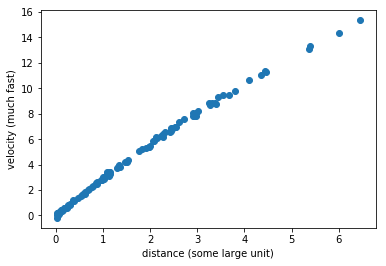

In [335]:
# visualize data
plt.scatter(dist, velocity)
plt.xlabel("distance (some large unit)")
plt.ylabel("velocity (much fast)");

In [346]:
# do the machine learnings
model = GaussianProcessRegressor()
model.fit(dist, velocity)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

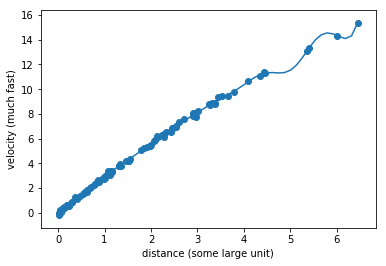

In [347]:
# plot the machine learnings
xTest = np.linspace(dist.min(), dist.max())[:,np.newaxis]
plt.plot(xTest, model.predict(xTest))
plt.scatter(dist, velocity)
plt.xlabel("distance (some large unit)")
plt.ylabel("velocity (much fast)");

In [341]:
print("rmse:", np.sqrt(np.mean(np.square(velocity - model.predict(dist)))))

rmse: 0.0876725804165


In [342]:
# but actually we should use training and testing data
xTrain, xTest, yTrain, yTest = train_test_split(dist, velocity)

In [343]:
# do some more machine learnings
model.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

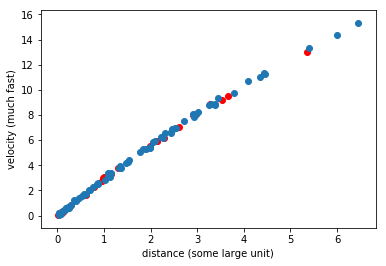

In [344]:
# show predictions on test data
plt.scatter(xTest, model.predict(xTest), color="r")
plt.scatter(xTrain, yTrain)
plt.xlabel("Distance")
plt.ylabel("Velocity")
plt.xlabel("distance (some large unit)")
plt.ylabel("velocity (much fast)");

In [345]:
print("rmse:", np.sqrt(np.mean(np.square(yTest - model.predict(xTest)))))

rmse: 0.153670966163


# Classification

In [352]:
# generate fake datas

NLCS = 100
NOBS = 200

t = np.random.rand(NLCS, NOBS) * np.pi * 10
t = np.sort(t, axis=1)
freq1a = np.abs(np.random.randn(NLCS//2)*0.3 + 1)[:,np.newaxis]
freq1b = np.abs(np.random.randn(NLCS//2)*0.3 + 3)[:,np.newaxis]

freq2a = np.abs(np.random.randn(NLCS//2)*0.4 + 2)[:,np.newaxis]
freq2b = np.abs(np.random.randn(NLCS//2)*0.4 + 4)[:,np.newaxis]
lcs = np.zeros(t.shape)
lcs[:NLCS//2,:] = np.sin((t[:NLCS//2,:] * freq1a)) + np.sin((t[:NLCS//2,:] * freq1b))
lcs[NLCS//2:,:] = np.sin((t[NLCS//2:,:] * freq2a)) + np.sin((t[NLCS//2:,:] * freq2b))
X = np.vstack([np.hstack([freq1a, freq1b]), np.hstack([freq2a, freq2b])])
y = np.arange(2).repeat(NLCS//2)

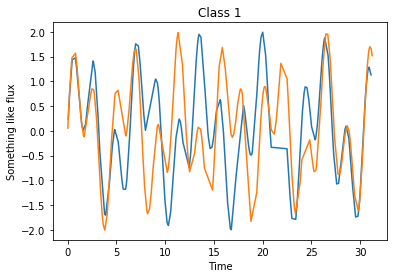

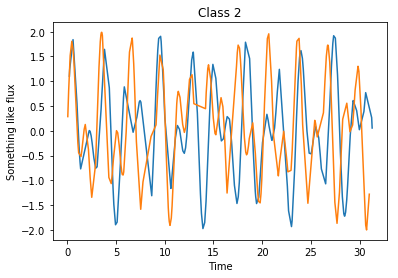

In [353]:
# visualize datas
plt.plot(t[0],lcs[0])
plt.plot(t[1],lcs[1])
plt.title("Class 1")
plt.xlabel("Time")
plt.ylabel("Something like flux");

plt.figure()
plt.title("Class 2")
plt.plot(t[50], lcs[50])
plt.plot(t[51], lcs[51])
plt.xlabel("Time")
plt.ylabel("Something like flux");

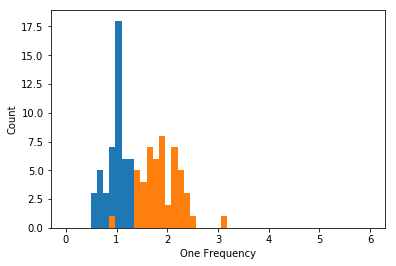

In [354]:
# histogram of one of the frequency peaks

plt.hist(freq1a, bins=np.linspace(0,6,50));
plt.hist(freq2a, bins=np.linspace(0,6,50));
plt.xlabel("One Frequency")
plt.ylabel("Count");

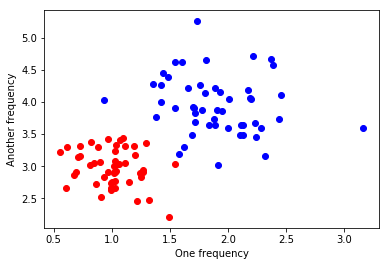

In [355]:
# histogram of both frequency peaks
plt.scatter(freq1a, freq1b, color="r")
plt.scatter(freq2a, freq2b, color="b")
plt.xlabel("One frequency")
plt.ylabel("Another frequency");

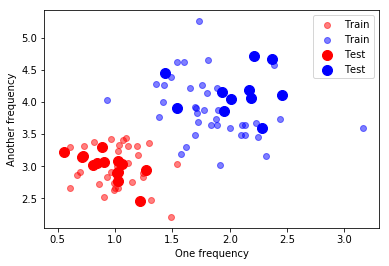

In [356]:
# always split into train/test!
XTrain, XTest, yTrain, yTest = train_test_split(X, y)

# this machine is learning so much today
model = RandomForestClassifier()
model.fit(XTrain, yTrain)

# visualize test performance
yPred = model.predict(XTest)
plt.scatter(XTrain[:,0][yTrain==0], XTrain[:,1][yTrain==0], color="r", alpha=0.5, label="Train")
plt.scatter(XTrain[:,0][yTrain==1], XTrain[:,1][yTrain==1], color="b", alpha=0.5, label="Train")
plt.scatter(XTest[:,0][yTest==0], XTest[:,1][yTest==0], color="r", s=100, label="Test")
plt.scatter(XTest[:,0][yTest==1], XTest[:,1][yTest==1], color="b", s=100, label="Test")
plt.legend()
plt.xlabel("One frequency")
plt.ylabel("Another frequency");

# Clustering

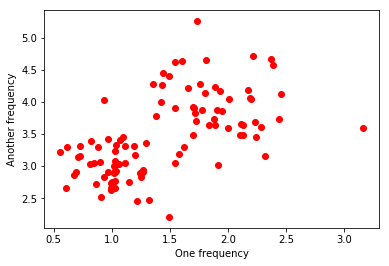

In [357]:
# use the same data but no class labels any more
plt.scatter(X[:,0], X[:,1], color="r");
plt.xlabel("One frequency")
plt.ylabel("Another frequency");

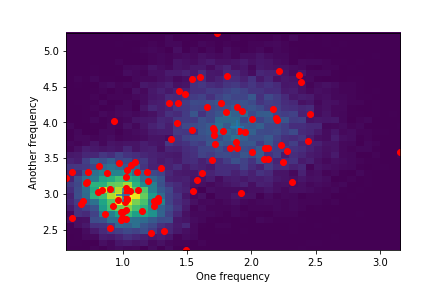

In [358]:
# ready, set, machine learning!
model = GaussianMixture(n_components=2)
model.fit(X)

# who knew that plotting was 4x harder than training a gaussian mixture model!
plt.scatter(X[:,0], X[:,1], color="r")
plt.scatter(model.means_[:,0], model.means_[:,1], marker="+", s=200)
samples1 = np.random.multivariate_normal(model.means_[0], model.covariances_[0], 10000)
samples2 = np.random.multivariate_normal(model.means_[1], model.covariances_[1], 10000)
samples = np.vstack([samples1, samples2])
plt.hist2d(samples[:,0], samples[:,1], bins=50)
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())
plt.xlabel("One frequency")
plt.ylabel("Another frequency");

# Dimensionality Reduction

In [359]:
# generate fake spectra

NLINES = 10
WAVELEN_MIN = 400
WAVELEN_MAX = 700
NSPECS = 1000

wavelen = np.arange(WAVELEN_MIN,WAVELEN_MAX,1)
specs = np.random.randn(NSPECS, wavelen.size)

# use same line locations for each spectrum
lineWavelens = np.random.rand(NLINES) * (WAVELEN_MAX - WAVELEN_MIN) + WAVELEN_MIN
lineWeights = (np.arange(NLINES) + 1)
np.random.shuffle(lineWeights)

for specId in range(NSPECS):
    for i in range(NLINES):
        lineHeights = np.random.randn(NLINES) * lineWeights
        specs[specId,:] += lineHeights[i]*np.exp(-(wavelen - lineWavelens[i])**2/10)

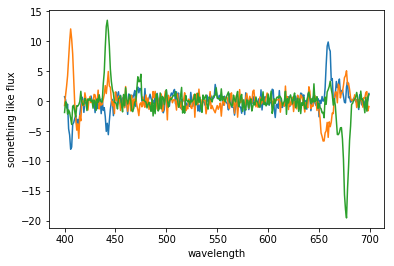

In [360]:
# visualize fake spectra
plt.plot(wavelen, specs[0])
plt.plot(wavelen, specs[1])
plt.plot(wavelen, specs[2])
plt.xlabel("wavelength")
plt.ylabel("something like flux");

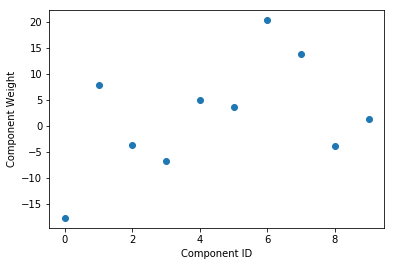

In [362]:
# you guessed it -- machine learning!
model = PCA(n_components = NLINES)
model.fit(specs)

# show the components for some spectrum
transformed = model.transform(specs)
plt.scatter(np.arange(transformed.shape[1]), transformed[1])
plt.xlabel("Component ID")
plt.ylabel("Component Weight");

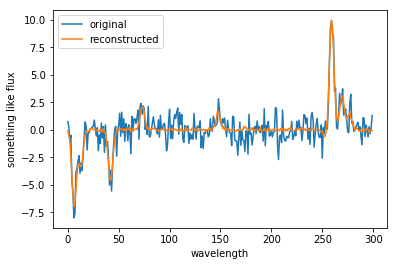

In [363]:
# check how good the reconstruction is
plt.plot(specs[0], label="original")
plt.plot(model.inverse_transform(transformed[0]), label="reconstructed")
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("something like flux");

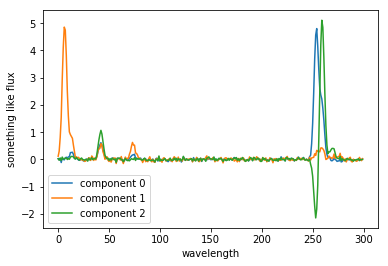

In [365]:
# look at the individual components
plt.plot(model.inverse_transform([10,0,0,0,0,0,0,0,0,0]), label="component 0")
plt.plot(model.inverse_transform([0,0,0,0,0,0,10,0,0,0]), label="component 1")
plt.plot(model.inverse_transform([0,0,10,0,0,0,0,0,0,0]), label="component 2")
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("something like flux");

# Reinforcement Learning!

nah just kidding